In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import ttest_ind
from scipy import stats

In [2]:
df_pitcher = pd.read_csv('df_pitcher_processed.csv')


In [3]:
df_pitcher.head()

,playerName,salary,adj_salary_filled,flag,Age,HT,WT,Bats,Throws,year,...,WP,BK,ERA,h9,hr9,bb9,so9,WHIP,total_years_mlb,minimum_year
0,AJ Achter,NaN,3106478.4,1,25,6-5,190,R,R,2014,...,0,0,3.27,11.45,1.64,2.45,4.09,1.55,1,480000
1,AJ Achter,507500.0,3284453.7,0,26,6-5,190,R,R,2015,...,0,0,6.75,8.10,2.70,4.05,9.45,1.35,2,507500
2,AJ Achter,NaN,3284453.7,1,27,6-5,190,R,R,2016,...,0,0,3.11,10.27,1.67,2.87,3.35,1.46,3,507500
3,AJ Burnett,16500000.0,106785193.3,0,33,6-5,205,R,R,2010,...,16,0,5.26,9.84,1.21,3.76,6.99,1.51,12,400000
4,AJ Burnett,16500000.0,106785193.3,0,34,6-5,205,R,R,2011,...,25,0,5.15,8.98,1.47,3.92,8.18,1.43,13,414000


# Quick Look

In [4]:
df_pitcher.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,5266.0,3.294634e+06,4.807093e+06,250000.0,507500.00,913750.00,4.200000e+06,42142857.0
adj_salary_filled,7696.0,1.561711e+07,2.707036e+07,1617957.5,3235914.90,3527147.30,1.427847e+07,272741401.9
flag,7696.0,3.157484e-01,4.648435e-01,0.0,0.00,0.00,1.000000e+00,1.0
Age,7696.0,2.801988e+01,3.850723e+00,19.0,25.00,27.00,3.000000e+01,49.0
WT,7696.0,1.931945e+02,2.045453e+01,140.0,180.00,190.00,2.050000e+02,288.0
year,7696.0,2.014706e+03,2.858890e+00,2010.0,2012.00,2015.00,2.017000e+03,2019.0
W,7696.0,3.180743e+00,4.022283e+00,0.0,0.00,2.00,4.000000e+00,24.0
L,7696.0,3.191528e+00,3.560992e+00,0.0,0.00,2.00,5.000000e+00,19.0
G,7696.0,2.598103e+01,2.051542e+01,1.0,9.00,22.00,3.500000e+01,92.0
GS,7696.0,6.390982e+00,1.042365e+01,0.0,0.00,0.00,9.000000e+00,35.0


In [5]:
df_pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696 entries, 0 to 7695
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   playerName         7696 non-null   object 
 1   salary             5266 non-null   float64
 2   adj_salary_filled  7696 non-null   float64
 3   flag               7696 non-null   int64  
 4   Age                7696 non-null   int64  
 5   HT                 7696 non-null   object 
 6   WT                 7696 non-null   int64  
 7   Bats               7696 non-null   object 
 8   Throws             7696 non-null   object 
 9   year               7696 non-null   int64  
 10  teamName           7696 non-null   object 
 11  posit              7696 non-null   object 
 12  borndate           7696 non-null   object 
 13  Place              7696 non-null   object 
 14  LeagueAbbr         7696 non-null   object 
 15  W                  7696 non-null   int64  
 16  L                  7696 

# Distribution of Salaries

In [6]:
x = np.log(df_pitcher['adj_salary_filled'][df_pitcher['year'] == 2010])
y = np.log(df_pitcher['adj_salary_filled'][df_pitcher['year'] == 2015])
z = np.log(df_pitcher['adj_salary_filled'][df_pitcher['year'] == 2019])

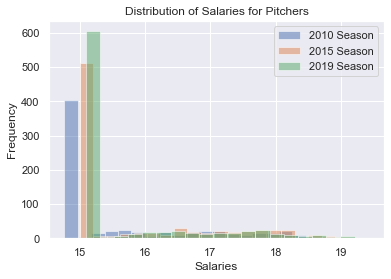

In [7]:
_ = plt.hist(x, bins=20, alpha=0.5, label='2010 Season')
_ = plt.hist(y, bins=20, alpha=0.5, label='2015 Season')
_ = plt.hist(z, bins=20, alpha=0.5, label='2019 Season')
_ = plt.xlabel('Salaries')
_ = plt.ylabel('Frequency')
_ = plt.legend()
_ = plt.title('Distribution of Salaries for Pitchers')
_ = plt.show()

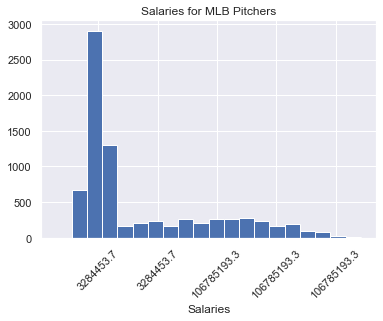

In [8]:
f, ax = plt.subplots()
x = (df_pitcher['adj_salary_filled'])
ax.hist(np.log(df_pitcher['adj_salary_filled']), bins=20)
ax.set_xticklabels(x)
plt.xlabel('Salaries')
plt.xticks(rotation=45)

plt.title('Salaries for MLB Pitchers')
plt.show()

# Plotting Correlation Matrix

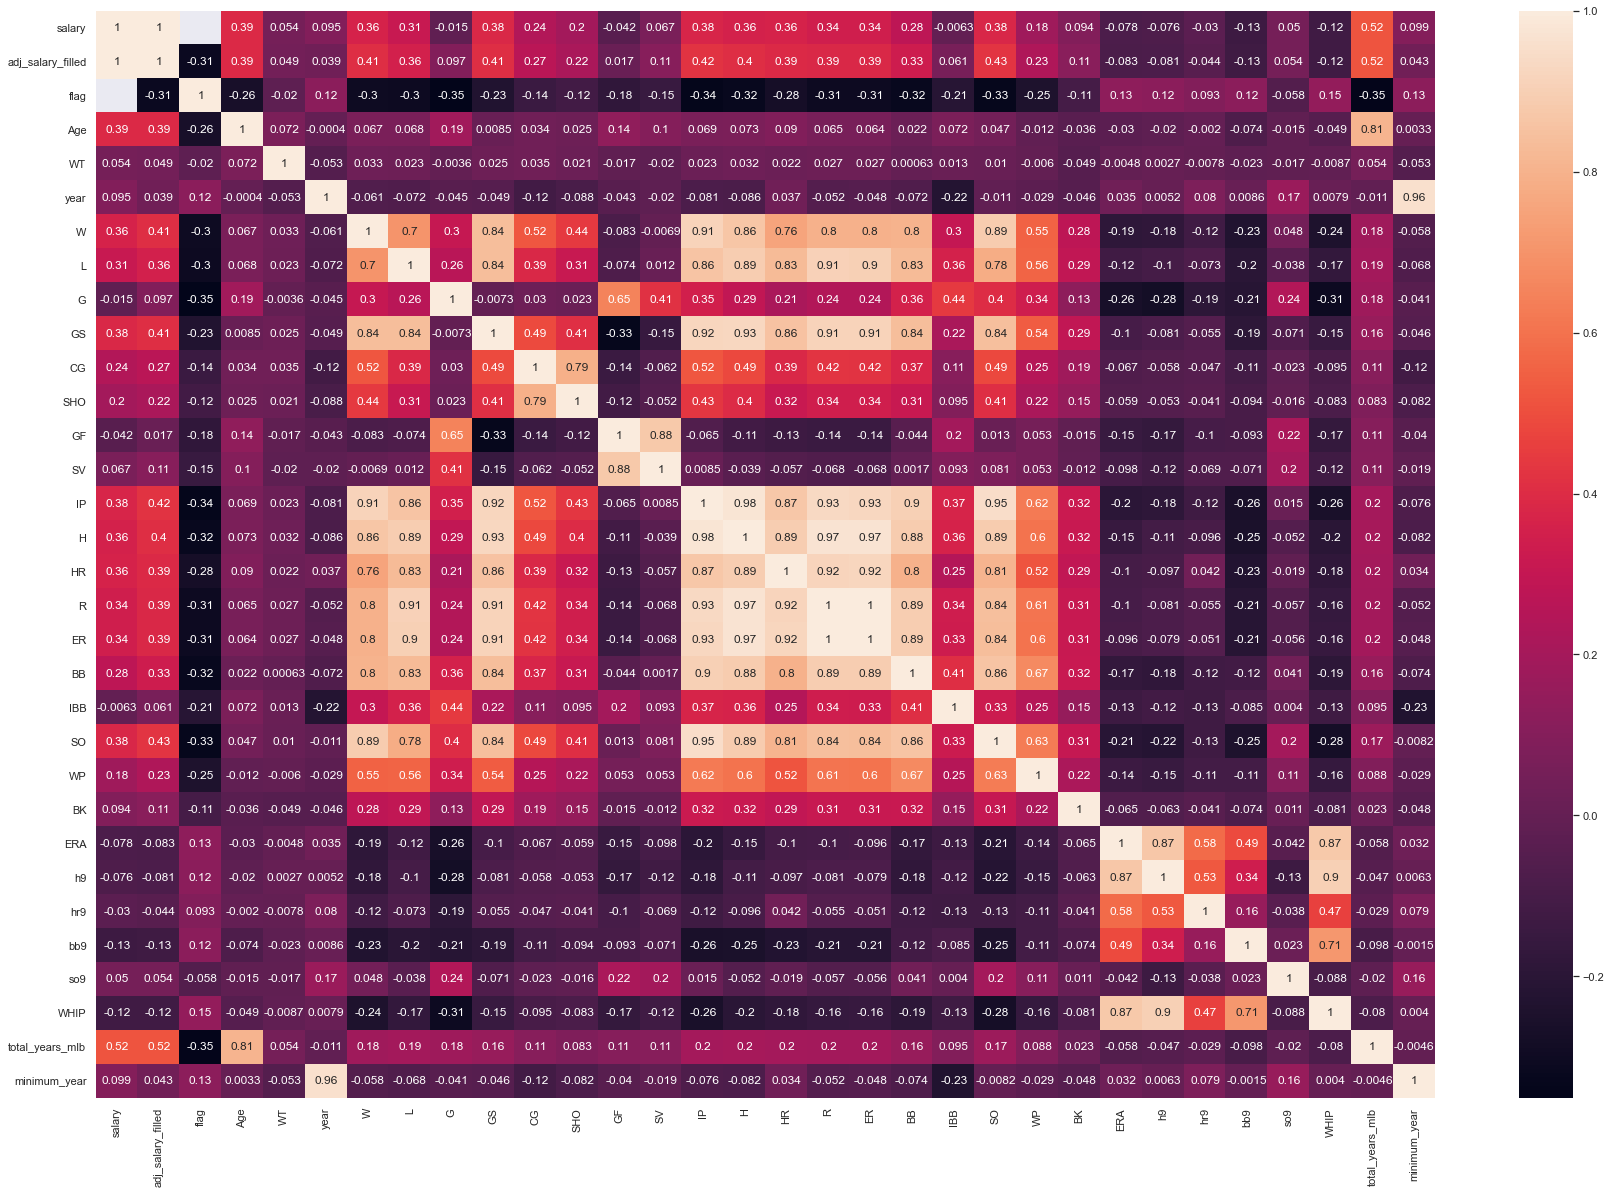

In [9]:
plt.figure(figsize=(30,20))
cor= df_pitcher.corr()
sns.heatmap(cor,annot=True)

In [10]:
#Correlation with output variable
cor_target = abs(cor["adj_salary_filled"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

salary               1.000000
adj_salary_filled    1.000000
flag                 0.310272
Age                  0.391690
W                    0.406481
L                    0.355426
GS                   0.407395
IP                   0.420481
H                    0.404449
HR                   0.392769
R                    0.385521
ER                   0.385179
BB                   0.333458
SO                   0.426906
total_years_mlb      0.515814
Name: adj_salary_filled, dtype: float64

# Independent Variables Vs. Dependant Variable Scatter Plots

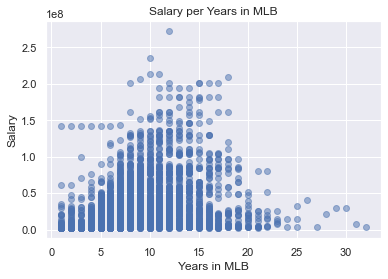

In [11]:
plt.scatter(df_pitcher['total_years_mlb'], df_pitcher['adj_salary_filled'],alpha=0.5)
plt.xlabel('Years in MLB')
plt.ylabel('Salary')
plt.title('Salary per Years in MLB')
plt.show()

# Strikeouts vs Salary

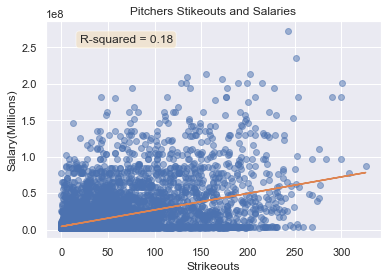

In [12]:
correlation_matrix = np.corrcoef(df_pitcher['SO'], df_pitcher['adj_salary_filled'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

x = df_pitcher['SO'].values
y = df_pitcher['adj_salary_filled'].values

plt.plot(x, y, 'o',alpha=0.5)
plt.xlabel('Strikeouts')
plt.ylabel('Salary(Millions)')
plt.title('Pitchers Stikeouts and Salaries')
m, b = np.polyfit(x, y, 1)
plt.text(.1, .90, 'R-squared = %0.2f' % r_squared, fontsize=12, transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.plot(x, m*x + b)
plt.show()

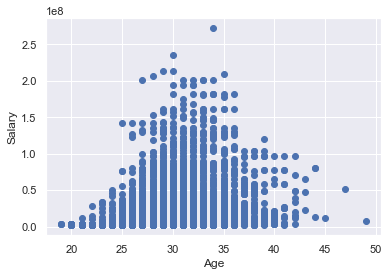

In [13]:
plt.scatter(df_pitcher['Age'], df_pitcher['adj_salary_filled'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# Home Runs Allowed vs Salary

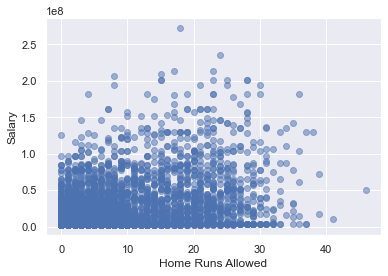

In [14]:
plt.scatter(df_pitcher['HR'], df_pitcher['adj_salary_filled'],alpha=0.5)
plt.xlabel('Home Runs Allowed')
plt.ylabel('Salary')
plt.show()

# Wins vs Salary

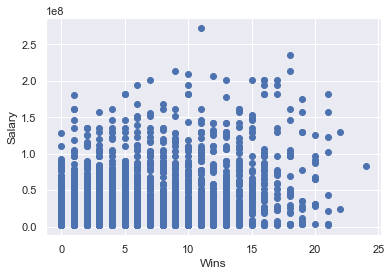

In [15]:
plt.scatter(df_pitcher['W'], df_pitcher['adj_salary_filled'])
plt.xlabel('Wins')
plt.ylabel('Salary')
plt.show()

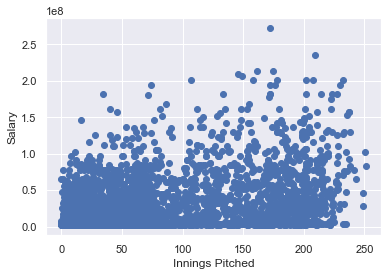

In [16]:
plt.scatter(df_pitcher['IP'], df_pitcher['adj_salary_filled'])
plt.xlabel('Innings Pitched')
plt.ylabel('Salary')
plt.show()

# Categorical Data vs Target Variable Plots

Text(0.5, 0, 'League')

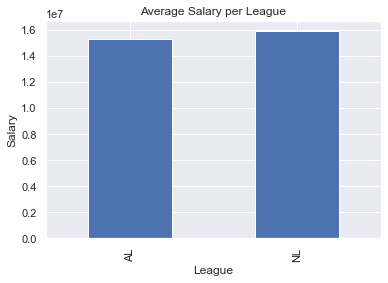

In [17]:

df2 = df_pitcher.groupby(['LeagueAbbr'])['adj_salary_filled'].mean()
df2.plot.bar()
plt.title('Average Salary per League')
plt.ylabel('Salary')
plt.xlabel('League')

# Average Salary per Throwing Arm Side

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

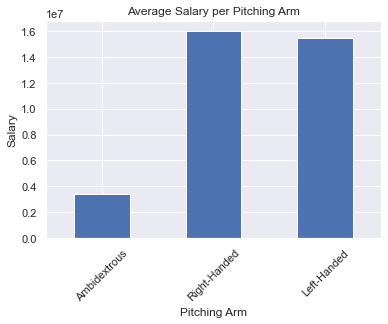

In [18]:
labels = ['Ambidextrous', 'Right-Handed', 'Left-Handed']
positions = (0, 1, 2)

df2 = df_pitcher.groupby(['Throws'])['adj_salary_filled'].mean()
df2.plot.bar()
plt.title('Average Salary per Pitching Arm')
plt.ylabel('Salary')
plt.xlabel('Pitching Arm')
plt.xticks(positions ,labels)
plt.xticks(rotation=45)

# From a pitchers perspective what team pays the most?

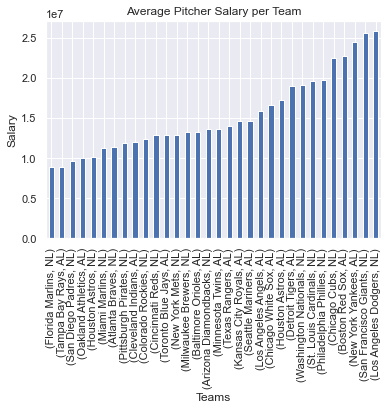

In [19]:
df3 = df_pitcher.groupby(['teamName','LeagueAbbr'])['adj_salary_filled'].mean().sort_values()
df3.plot.bar()
plt.title('Average Pitcher Salary per Team')
plt.ylabel('Salary')
plt.xlabel('Teams')
plt.show()